In [1]:
#install.packages('package-name',repos='http://cran.us.r-project.org')
#https://cs.hse.ru/data/2015/05/14/1098547089/4._Centrality_Metrics.pdf
library(igraph)
el=read.csv('test.edgelist',header=FALSE,sep=' ')   #file.choose()) # read the 'el.with.weights.csv' file 
g=graph.data.frame(el)
E(g)$weight<-E(g)$V3



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
EigenCentrality = eigen_centrality(g, directed=TRUE, weights=E(g)$weight)$vector
EigenCentrality = EigenCentrality/max(EigenCentrality)



Warning message in .Call("R_igraph_eigenvector_centrality", graph, directed, scale, :
“At centrality.c:362 :Weighted directed graph in eigenvector centrality”

In [3]:

PageRank= page_rank(g, algo = c('prpack', 'arpack', 'power'), vids = V(g),
     directed = TRUE, damping = 0.85, personalized = NULL, weights = NULL,
     options = NULL)$vector
PageRank=PageRank/max(PageRank)


In [4]:
Betweenness=betweenness(g, directed=TRUE)
Betweenness = Betweenness/max(Betweenness)


In [5]:
Hubs = hub_score(g)$vector


In [6]:
Authorities=authority_score(g, weights=NA)$vector


In [7]:
Closeness = closeness(g, vids = V(g), mode = c( "all"),
  weights = NULL, normalized = FALSE)

In [8]:
Flux = strength(g,vids=V(g),mode=c("all"))
Flux = Flux/max(Flux)

FluxIn = strength(g,vids=V(g),mode=c("in"))
FluxIn = FluxIn/max(FluxIn)

FluxOut = strength(g,vids=V(g),mode=c("out"))
FluxOut = FluxOut/max(FluxOut)


In [9]:
library(Hmisc)
library(ggplot2)
require(reshape2)

df = data.frame(Flux,FluxIn,FluxOut,Closeness,EigenCentrality,PageRank,Betweenness,Authorities,Hubs)

df1 <- melt(df ,  id.vars = 'Flux', variable.name = 'series')
df1$Value = df1$value

df

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units

Loading required package: reshape2


,Flux,FluxIn,FluxOut,Closeness,EigenCentrality,PageRank,Betweenness,Authorities,Hubs
MACROO,4.781610e-16,0.000000e+00,4.796619e-16,6.250274e-07,1.175790e-17,0.2784675,0.0000000,1.053961e-16,0.000000000
HCOOH,3.129238e-03,0.000000e+00,3.139060e-03,1.559641e-07,1.175790e-17,0.2784675,0.0000000,1.053961e-16,0.003139061
MVKOO,8.499127e-16,0.000000e+00,8.525806e-16,6.250273e-07,1.175790e-17,0.2784675,0.0000000,1.053961e-16,0.000000000
CO,9.970675e-01,1.967311e-04,1.000000e+00,6.250274e-07,2.339677e-06,0.5703943,1.0000000,1.000000e+00,1.000000000
MVK,5.265878e-04,2.901995e-08,5.282116e-04,6.250273e-07,2.911105e-08,0.5151649,0.7500000,0.000000e+00,0.000000000
MACR,6.365075e-05,1.632663e-08,6.383417e-05,6.250274e-07,1.637788e-08,0.5151649,0.8333333,0.000000e+00,0.000000000
CO2,1.000000e+00,1.000000e+00,0.000000e+00,1.564535e-07,1.000000e+00,1.0000000,0.0000000,0.000000e+00,0.000000000
MGLOO,1.755196e-04,1.755196e-04,0.000000e+00,6.245882e-07,2.190729e-06,0.4244309,0.0000000,5.000000e-01,0.000000000
CH2OO,1.967311e-04,1.967311e-04,0.000000e+00,6.249743e-07,2.339677e-06,0.5703943,0.0000000,1.000000e+00,0.000000000
MGLYOO,2.121148e-05,2.121148e-05,0.000000e+00,6.249743e-07,1.489477e-07,0.4244309,0.0000000,5.000000e-01,0.000000000


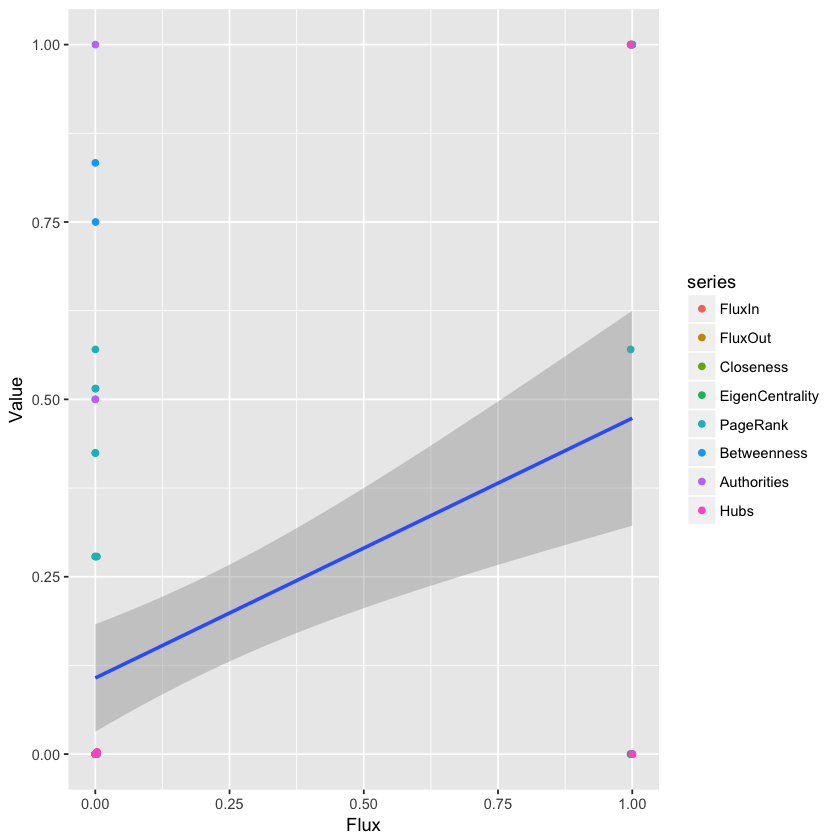

In [10]:
ggplot(df1, aes(Flux,Value)) + geom_point(aes(colour = series))+
geom_smooth(method='lm')



In [11]:
write.csv(df, file = "centrality.csv")

In [12]:
edge_density(g, loops = FALSE)

[1] 0.1333333